### This notebook contains code that focuses on stock market data . Here's a summary of the key operations:

Imports Essential Libraries: It loads libraries such as pandas, numpy, matplotlib, and plotly for data manipulation, visualization, and analysis.

Installs and Imports yfinance: The notebook installs the yfinance package, which allows fetching stock market data.

Stock Symbol List: It defines a list of stock symbols—ONCO, CNEY, TNXP, APLD, and KTTA—for which the analysis is performed.

Historical Data Retrieval: The notebook fetches historical stock data for the defined symbols using yfinance for the date range from 2022-01-01 to 2024-09-26.

Data Concatenation: After retrieving the data for each symbol, it appends the data into a single DataFrame, showing fields such as Date, Symbol, Open, Close, High, Low, and Volume.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Step 1: Install yfinance Library

In [2]:
!pip install yfinance

### Step 2: Import and Download Stock Data
After installing, import the library and use the yfinance.Ticker() function to retrieve historical stock data.

In [3]:
import yfinance as yf

In [13]:
# List of stock symbols
symbols = ['ONCO', 'CNEY', 'TNXP', 'APLD', 'KTTA']

# Define the date range
start_date = '2022-01-01'
end_date = '2024-09-26'


In [14]:
# Create a list to store individual DataFrames
stock_data_list = []

# Loop through each stock symbol
for symbol in symbols:
    ticker = yf.Ticker(symbol)
  
    # Fetch historical data
    historical_data = ticker.history(start=start_date, end=end_date)
    
    # Add the stock symbol to the DataFrame
    historical_data['Symbol'] = symbol
    
    # Append the DataFrame to the list
    stock_data_list.append(historical_data)

# Combine all DataFrames into a single DataFrame
all_stock_data = pd.concat(stock_data_list)

# Reset index for better readability
all_stock_data.reset_index(inplace=True)

# Display the relevant fields
print(all_stock_data[['Date', 'Symbol', 'Open', 'Close', 'High', 'Low', 'Volume',]])
#print(all_stock_data)

                          Date Symbol         Open        Close         High  \
0    2022-02-18 00:00:00-05:00   ONCO  2000.000000  2296.000000  2300.000000   
1    2022-02-22 00:00:00-05:00   ONCO  2700.000000  2278.800049  3636.000000   
2    2022-02-23 00:00:00-05:00   ONCO  1895.599976  1992.000000  2072.000000   
3    2022-02-24 00:00:00-05:00   ONCO  1600.800049  1712.199951  1780.000000   
4    2022-02-25 00:00:00-05:00   ONCO  1559.599976  1774.000000  1779.599976   
...                        ...    ...          ...          ...          ...   
3322 2024-09-19 00:00:00-04:00   KTTA     6.280000     4.800000     6.299000   
3323 2024-09-20 00:00:00-04:00   KTTA     4.680000     4.420000     4.800000   
3324 2024-09-23 00:00:00-04:00   KTTA     4.420000     4.100000     4.700000   
3325 2024-09-24 00:00:00-04:00   KTTA     4.110000     3.963000     4.315000   
3326 2024-09-25 00:00:00-04:00   KTTA     4.000000     3.845000     4.110000   

              Low  Volume  
0     1520.

In [59]:
#stock_info = ticker.info
#print(stock_info)

## Step 3: Check the Fields

Date (timestamp): Automatically provided by the index.

Open: The opening price of the stock.

High: The highest price of the stock during the trading day.

Low: The lowest price of the stock during the trading day.

Close: The closing price of the stock.

Volume: The trading volume of the stock.

Symbol: Added manually to indicate which stock each row corresponds to.

In [15]:
all_stock_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol
3322,2024-09-19 00:00:00-04:00,6.28,6.299,4.623,4.800,66400,0.0,0.0,KTTA
3323,2024-09-20 00:00:00-04:00,4.68,4.800,4.420,4.420,9400,0.0,0.0,KTTA
3324,2024-09-23 00:00:00-04:00,4.42,4.700,4.100,4.100,7800,0.0,0.0,KTTA
3325,2024-09-24 00:00:00-04:00,4.11,4.315,3.835,3.963,90600,0.0,0.0,KTTA
3326,2024-09-25 00:00:00-04:00,4.00,4.110,3.800,3.845,20800,0.0,0.0,KTTA


In [16]:
symbol_count=all_stock_data.value_counts(["Symbol"])
print(symbol_count)

Symbol
CNEY      686
KTTA      686
TNXP      686
ONCO      653
APLD      616
Name: count, dtype: int64


In [17]:
all_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3327 non-null   datetime64[ns, America/New_York]
 1   Open          3327 non-null   float64                         
 2   High          3327 non-null   float64                         
 3   Low           3327 non-null   float64                         
 4   Close         3327 non-null   float64                         
 5   Volume        3327 non-null   int64                           
 6   Dividends     3327 non-null   float64                         
 7   Stock Splits  3327 non-null   float64                         
 8   Symbol        3327 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1), object(1)
memory usage: 234.1+ KB


In [18]:
# Filter rows where 'Dividends' or 'Stock Splits' is not equal to 0.0
non_zero_data = all_stock_data[(all_stock_data['Dividends'] != 0.0) | (all_stock_data['Stock Splits'] != 0.0)]

# Display the filtered DataFrame
print(non_zero_data[['Date','Dividends', 'Stock Splits','Symbol']])


                          Date  Dividends  Stock Splits Symbol
651  2024-09-24 00:00:00-04:00        0.0      0.025000   ONCO
1166 2024-01-19 00:00:00-05:00        0.0      0.033333   CNEY
1432 2022-05-17 00:00:00-04:00        0.0      0.031250   TNXP
1678 2023-05-10 00:00:00-04:00        0.0      0.160000   TNXP
1950 2024-06-10 00:00:00-04:00        0.0      0.031250   TNXP
2025 2022-04-13 00:00:00-04:00        0.0      0.166667   APLD
3142 2024-01-02 00:00:00-05:00        0.0      0.050000   KTTA


## Check Stock Splits over time for each stock symbol

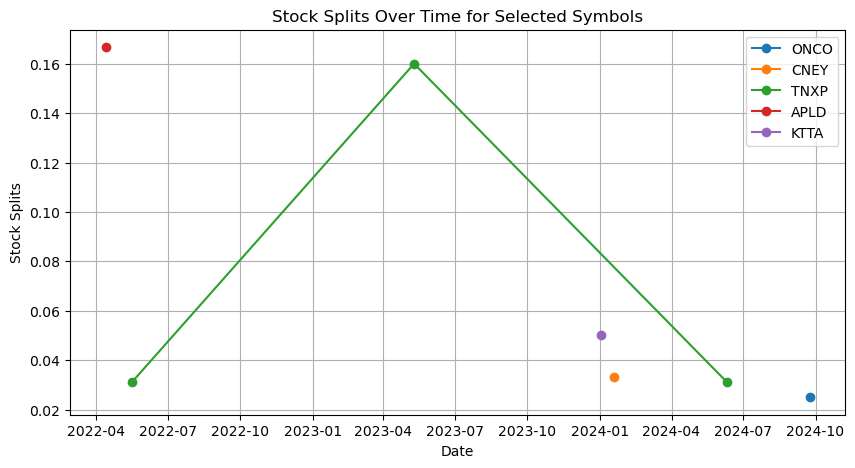

In [19]:
# Plot the Stock Splits over time for each stock symbol
plt.figure(figsize=(10, 5))
for symbol in non_zero_data['Symbol'].unique():
    symbol_data = non_zero_data[non_zero_data['Symbol'] == symbol]
    plt.plot(symbol_data['Date'], symbol_data['Stock Splits'], marker='o', label=symbol)

# Add titles and labels
plt.title('Stock Splits Over Time for Selected Symbols')
plt.xlabel('Date')
plt.ylabel('Stock Splits')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [20]:
all_stock_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3327.000000,3327.000000,3327.000000,3327.000000,3.327000e+03,3327.0,3327.000000
mean,94.591246,100.003597,87.949593,93.535510,1.333773e+06,0.0,0.000150
std,320.529114,341.143025,295.973710,318.499669,1.051370e+07,0.0,0.004229
min,0.130000,0.130000,0.130000,0.130000,0.000000e+00,0.0,0.000000
25%,4.945000,5.124000,4.705000,4.880000,3.297500e+03,0.0,0.000000
50%,9.600000,9.960000,9.000000,9.500000,1.365500e+04,0.0,0.000000
75%,47.200001,49.050001,45.299999,46.799999,1.290830e+05,0.0,0.000000
max,2700.000000,3636.000000,2500.800049,2716.000000,3.474761e+08,0.0,0.166667


Most stocks in this dataset have lower prices (median around $9.60) and low trading volume, but there are some stocks with very high prices and significant trading volumes.
Stock splits and dividends are rare events, as indicated by the low average stock split value and all dividends being zero.

Overall Summary:
The dataset mainly consists of low-to-moderate priced stocks, with a few outliers that are significantly more valuable.
Stock splits are uncommon, and dividends were not issued for these stocks.
Volume varies widely, with some stocks experiencing high trading activity at certain points.

## Step 4: Save the Data

In [21]:
all_stock_data.to_csv('stock_data.csv', index=False)